# Data Retrieval & Inspection 

In [1]:
import pandas as pd

data= pd.read_csv("/home/enojeyyyyyyy/Downloads/circles_binary_classification.csv")

data.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [2]:
data.describe()

,X1,X2,label
count,1000.000000,1000.000000,1000.00000
mean,-0.000448,-0.000804,0.50000
std,0.639837,0.641156,0.50025
min,-1.059502,-1.067768,0.00000
25%,-0.619251,-0.612176,0.00000
50%,0.008762,-0.003949,0.50000
75%,0.621933,0.624822,1.00000
max,1.033712,1.036004,1.00000


# Data Cleaning & Feature Design

In [3]:
print(data.isnull().sum())

X1       0
X2       0
label    0
dtype: int64


In [4]:
X = data[['X1','X2']].values
y = data['label'].values

In NN no need to feature design,it is an automatic step

In [34]:
import torch
from torch import nn

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).squeeze()

/tmp/ipykernel_5062/3747354237.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
/tmp/ipykernel_5062/3747354237.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32).squeeze()


## Visualize data

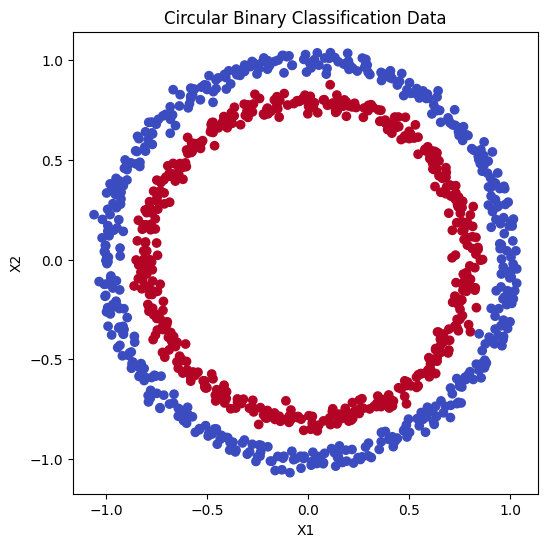

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(data["X1"], data["X2"], c=data["label"], cmap="coolwarm")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Circular Binary Classification Data")
plt.show()

## Train/test split 

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Device & dtype 

In [37]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Implement baseline models

MODEL

In [75]:
torch.manual_seed(42)

# Model V0 – linear, no activation
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 5)
        self.layer2 = nn.Linear(5, 1)
    
    def forward(self, x):
        return self.layer2(self.layer1(x))

# Model V1 – deeper linear
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 15)
        self.layer2 = nn.Linear(15, 15)
        self.layer3 = nn.Linear(15, 1)
    
    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))

# Model V2 – non-linear (ReLU)
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 64)
        self.layer2 = nn.Linear(64, 64)
        self.layer3 = nn.Linear(64, 10)
        self.layer4 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        return self.layer4(x)

Loss, optimizer, training loop

In [77]:
model_v0 = CircleModelV0()
print("Training ModelV0 (linear) ...")
losses_v0_tr, losses_v0_te, accs_v0_tr, accs_v0_te = train_model(model_v0, epochs=100, lr=0.1)

Training ModelV0 (linear) ...
Epoch    0 | Train Loss: 0.6957 Acc: 50.00% | Test Loss: 0.6972 Acc: 50.00%
Epoch   10 | Train Loss: 0.6940 Acc: 50.00% | Test Loss: 0.6962 Acc: 50.00%
Epoch   20 | Train Loss: 0.6934 Acc: 46.00% | Test Loss: 0.6959 Acc: 48.50%
Epoch   30 | Train Loss: 0.6932 Acc: 49.00% | Test Loss: 0.6958 Acc: 47.50%
Epoch   40 | Train Loss: 0.6931 Acc: 49.50% | Test Loss: 0.6957 Acc: 46.50%
Epoch   50 | Train Loss: 0.6931 Acc: 50.38% | Test Loss: 0.6957 Acc: 46.50%
Epoch   60 | Train Loss: 0.6931 Acc: 50.50% | Test Loss: 0.6956 Acc: 46.50%
Epoch   70 | Train Loss: 0.6930 Acc: 50.50% | Test Loss: 0.6956 Acc: 46.50%
Epoch   80 | Train Loss: 0.6930 Acc: 50.75% | Test Loss: 0.6955 Acc: 46.50%
Epoch   90 | Train Loss: 0.6930 Acc: 50.38% | Test Loss: 0.6955 Acc: 46.50%
Epoch  100 | Train Loss: 0.6930 Acc: 50.50% | Test Loss: 0.6954 Acc: 46.50%


In [78]:
# Untrained vs Trained predictions (first 10)
with torch.inference_mode():
    untrained_logits = model_v0(X_test)[:10].squeeze()
    trained_logits   = model_v0(X_test)[:10].squeeze()

print("Untrained logits (first 10):", untrained_logits.round(decimals=4))
print("Trained logits (first 10):",   trained_logits.round(decimals=4))
print("True labels:", y_test[:10])

Untrained logits (first 10): tensor([ 0.0249,  0.0620, -0.0575,  0.0482, -0.0339, -0.0114,  0.0744,  0.0573,
        -0.0584,  0.0648])
Trained logits (first 10): tensor([ 0.0249,  0.0620, -0.0575,  0.0482, -0.0339, -0.0114,  0.0744,  0.0573,
        -0.0584,  0.0648])
True labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


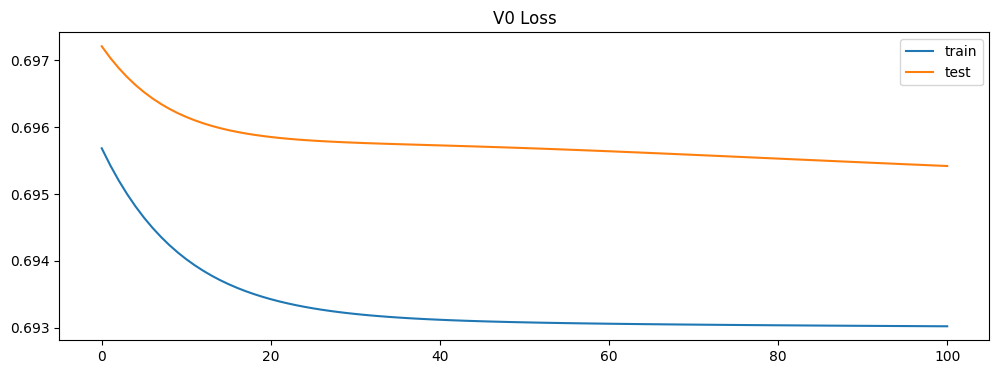

In [80]:
plt.figure(figsize=(12,4))
plt.plot(losses_v0_tr, label='train'); plt.plot(losses_v0_te, label='test'); plt.title("V0 Loss"); plt.legend()
plt.show()

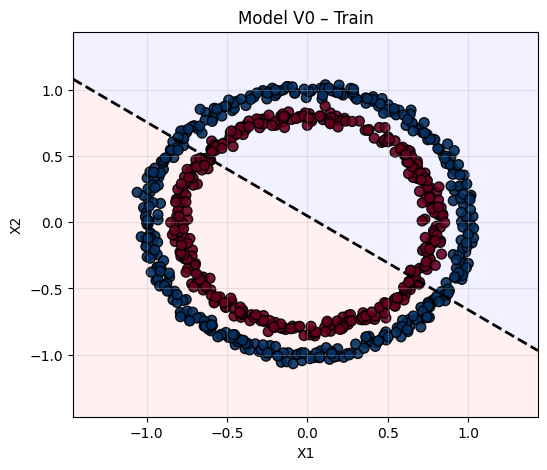

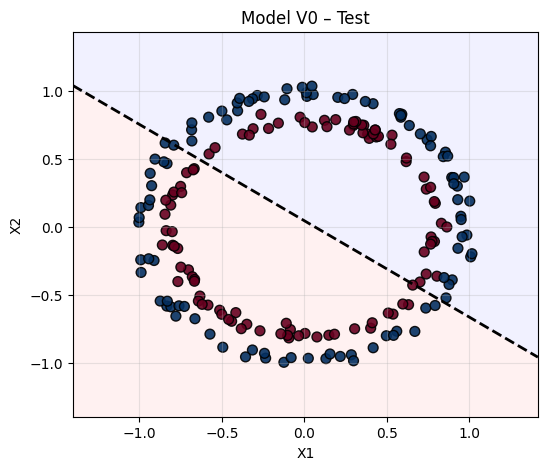

In [81]:
plot_decision_boundary(model_v0, X_train, y_train, "Model V0 – Train")
plot_decision_boundary(model_v0, X_test,  y_test,  "Model V0 – Test")

In [82]:
# Model V1 

model_v1 = CircleModelV1()
print("\nTraining ModelV1 (deeper linear) ...")
losses_v1_tr, losses_v1_te, accs_v1_tr, accs_v1_te = train_model(model_v1, epochs=1000, lr=0.1)


Training ModelV1 (deeper linear) ...
Epoch    0 | Train Loss: 0.6959 Acc: 50.00% | Test Loss: 0.6954 Acc: 50.00%
Epoch   50 | Train Loss: 0.6930 Acc: 51.12% | Test Loss: 0.6943 Acc: 47.00%
Epoch  100 | Train Loss: 0.6930 Acc: 51.25% | Test Loss: 0.6946 Acc: 46.50%
Epoch  150 | Train Loss: 0.6930 Acc: 51.38% | Test Loss: 0.6946 Acc: 46.00%
Epoch  200 | Train Loss: 0.6930 Acc: 51.62% | Test Loss: 0.6947 Acc: 45.00%
Epoch  250 | Train Loss: 0.6930 Acc: 51.25% | Test Loss: 0.6947 Acc: 45.00%
Epoch  300 | Train Loss: 0.6930 Acc: 51.12% | Test Loss: 0.6947 Acc: 46.00%
Epoch  350 | Train Loss: 0.6930 Acc: 51.00% | Test Loss: 0.6947 Acc: 46.00%
Epoch  400 | Train Loss: 0.6930 Acc: 51.00% | Test Loss: 0.6947 Acc: 46.00%
Epoch  450 | Train Loss: 0.6930 Acc: 51.00% | Test Loss: 0.6947 Acc: 46.00%
Epoch  500 | Train Loss: 0.6930 Acc: 51.00% | Test Loss: 0.6947 Acc: 46.00%
Epoch  550 | Train Loss: 0.6930 Acc: 51.00% | Test Loss: 0.6947 Acc: 46.00%
Epoch  600 | Train Loss: 0.6930 Acc: 51.00% | Test

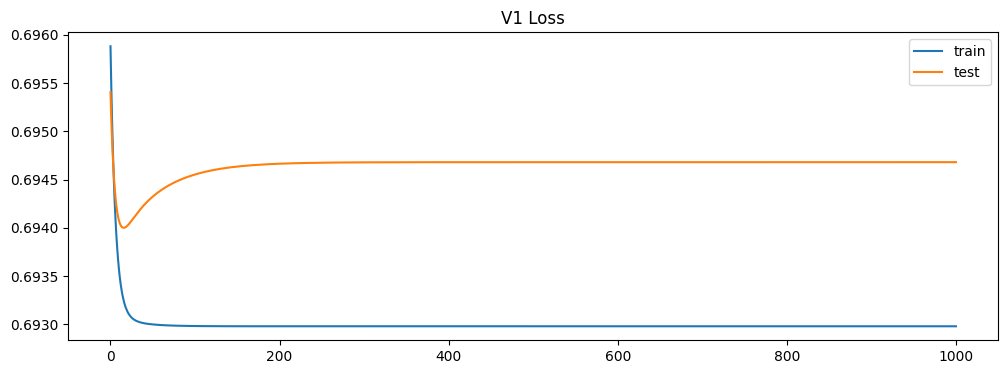

In [89]:
plt.figure(figsize=(12,4))
plt.plot(losses_v1_tr, label='train'); plt.plot(losses_v1_te, label='test'); plt.title("V1 Loss"); plt.legend()
plt.show()

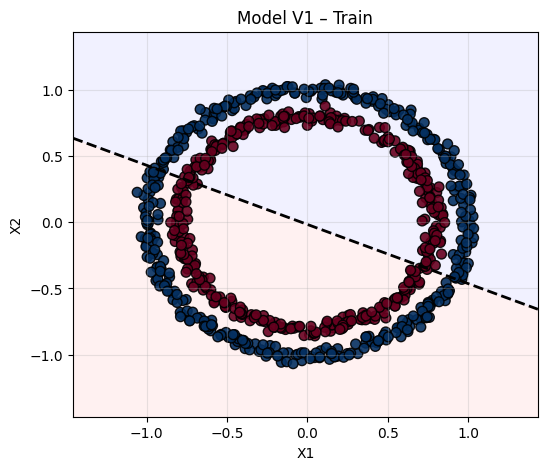

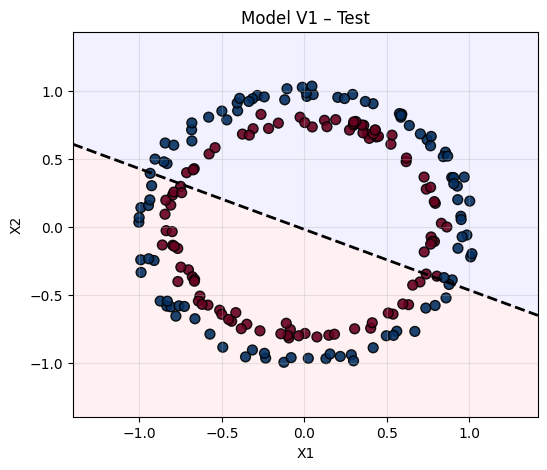

In [83]:
plot_decision_boundary(model_v1, X_train, y_train, "Model V1 – Train")
plot_decision_boundary(model_v1, X_test,  y_test,  "Model V1 – Test")

In [84]:
#Model V2

model_v2_sgd = CircleModelV2()
print("\nTraining ModelV2 (non-linear) with SGD ...")
losses_v2s_tr, losses_v2s_te, accs_v2s_tr, accs_v2s_te = train_model(model_v2_sgd, epochs=1500, lr=0.1)


Training ModelV2 (non-linear) with SGD ...
Epoch    0 | Train Loss: 0.6962 Acc: 50.00% | Test Loss: 0.6956 Acc: 50.00%
Epoch   75 | Train Loss: 0.6894 Acc: 54.25% | Test Loss: 0.6906 Acc: 53.50%
Epoch  150 | Train Loss: 0.6849 Acc: 64.88% | Test Loss: 0.6875 Acc: 63.50%
Epoch  225 | Train Loss: 0.6769 Acc: 70.25% | Test Loss: 0.6817 Acc: 63.00%
Epoch  300 | Train Loss: 0.6588 Acc: 80.88% | Test Loss: 0.6678 Acc: 73.00%
Epoch  375 | Train Loss: 0.6050 Acc: 93.38% | Test Loss: 0.6211 Acc: 91.00%
Epoch  450 | Train Loss: 0.4134 Acc: 99.50% | Test Loss: 0.4486 Acc: 97.50%
Epoch  525 | Train Loss: 0.4469 Acc: 67.12% | Test Loss: 0.4921 Acc: 63.00%
Epoch  600 | Train Loss: 0.3349 Acc: 82.50% | Test Loss: 0.4085 Acc: 75.00%
Epoch  675 | Train Loss: 0.0696 Acc: 100.00% | Test Loss: 0.1007 Acc: 100.00%
Epoch  750 | Train Loss: 0.0319 Acc: 100.00% | Test Loss: 0.0544 Acc: 100.00%
Epoch  825 | Train Loss: 0.0193 Acc: 100.00% | Test Loss: 0.0374 Acc: 100.00%
Epoch  900 | Train Loss: 0.0135 Acc: 1

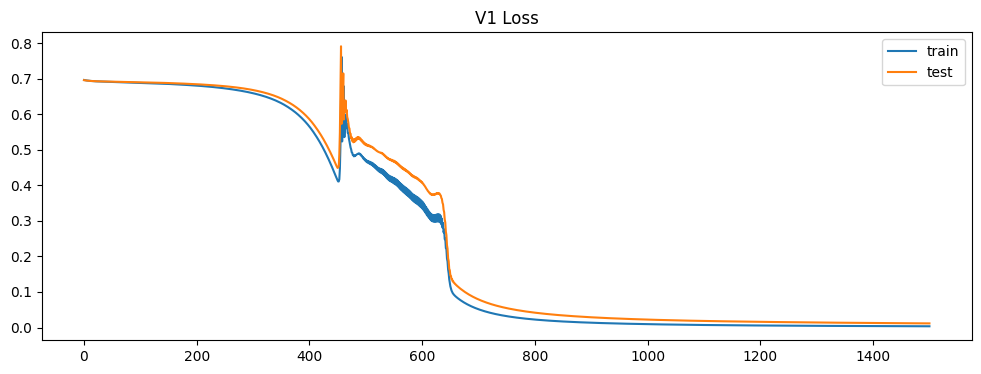

In [90]:
plt.figure(figsize=(12,4))
plt.plot(losses_v2s_tr, label='train'); plt.plot(losses_v2s_te, label='test'); plt.title("V1 Loss"); plt.legend()
plt.show()

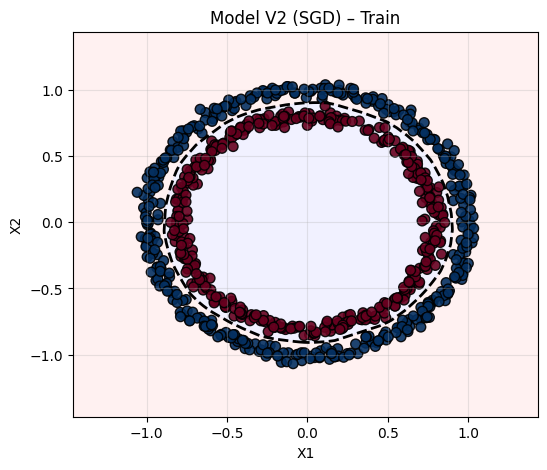

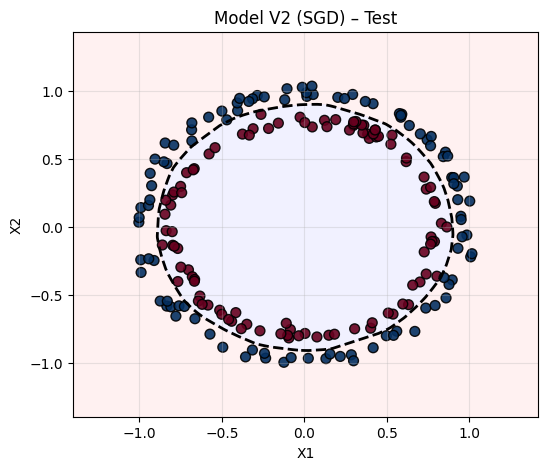

In [85]:
plot_decision_boundary(model_v2_sgd, X_train, y_train, "Model V2 (SGD) – Train")
plot_decision_boundary(model_v2_sgd, X_test,  y_test,  "Model V2 (SGD) – Test")

In [86]:
#Model V2 – Adam 

model_v2_adam = CircleModelV2()
print("\nTraining ModelV2 (non-linear) with Adam ...")
losses_v2a_tr, losses_v2a_te, accs_v2a_tr, accs_v2a_te = train_model(
    model_v2_adam, epochs=500, lr=0.01, optimizer_cls=torch.optim.Adam
)


Training ModelV2 (non-linear) with Adam ...
Epoch    0 | Train Loss: 0.6962 Acc: 50.00% | Test Loss: 0.6908 Acc: 61.50%
Epoch   25 | Train Loss: 0.1640 Acc: 99.88% | Test Loss: 0.1788 Acc: 99.00%
Epoch   50 | Train Loss: 0.0030 Acc: 100.00% | Test Loss: 0.0093 Acc: 100.00%
Epoch   75 | Train Loss: 0.0010 Acc: 100.00% | Test Loss: 0.0054 Acc: 100.00%
Epoch  100 | Train Loss: 0.0007 Acc: 100.00% | Test Loss: 0.0044 Acc: 100.00%
Epoch  125 | Train Loss: 0.0006 Acc: 100.00% | Test Loss: 0.0038 Acc: 100.00%
Epoch  150 | Train Loss: 0.0005 Acc: 100.00% | Test Loss: 0.0034 Acc: 100.00%
Epoch  175 | Train Loss: 0.0004 Acc: 100.00% | Test Loss: 0.0031 Acc: 100.00%
Epoch  200 | Train Loss: 0.0003 Acc: 100.00% | Test Loss: 0.0029 Acc: 100.00%
Epoch  225 | Train Loss: 0.0003 Acc: 100.00% | Test Loss: 0.0026 Acc: 100.00%
Epoch  250 | Train Loss: 0.0002 Acc: 100.00% | Test Loss: 0.0024 Acc: 100.00%
Epoch  275 | Train Loss: 0.0002 Acc: 100.00% | Test Loss: 0.0023 Acc: 100.00%
Epoch  300 | Train Loss

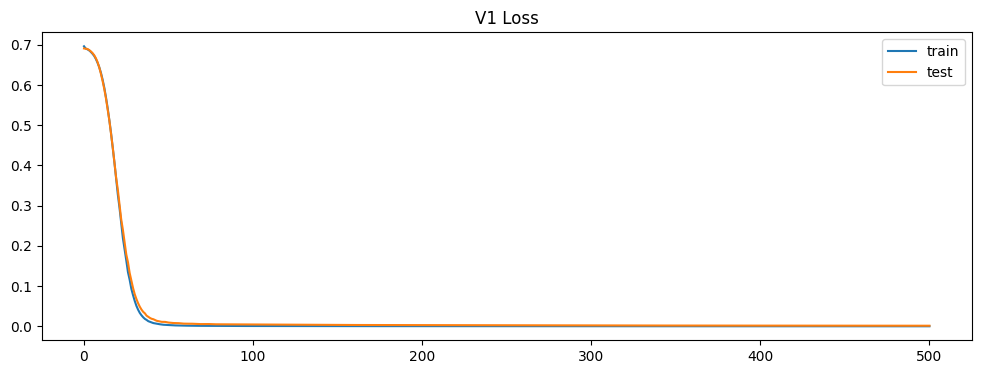

In [91]:
plt.figure(figsize=(12,4))
plt.plot(losses_v2a_tr, label='train'); plt.plot(losses_v2a_te, label='test'); plt.title("V1 Loss"); plt.legend()
plt.show()

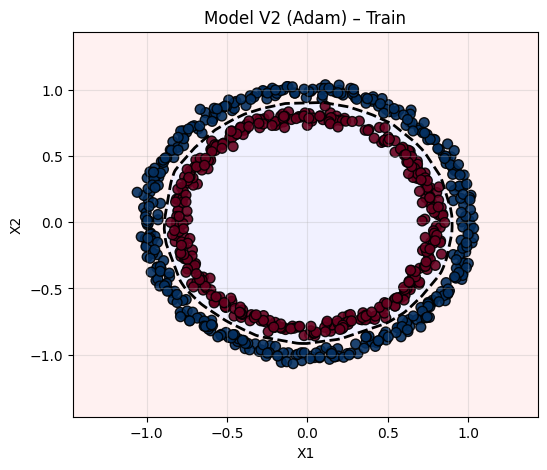

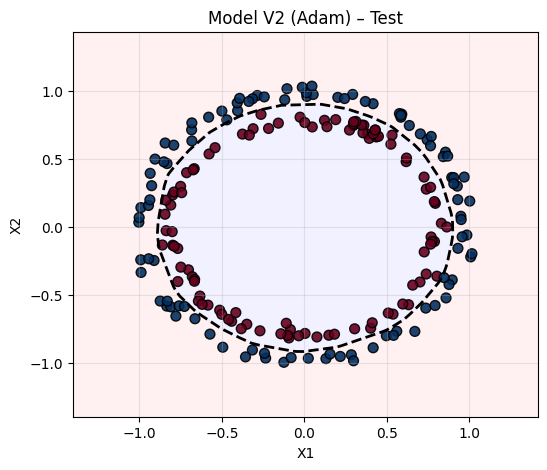

In [87]:
plot_decision_boundary(model_v2_adam, X_train, y_train, "Model V2 (Adam) – Train")
plot_decision_boundary(model_v2_adam, X_test,  y_test,  "Model V2 (Adam) – Test")

# Discussion and conclusion

In this project, the simple models (V0 and V1) without any activation function only reached around 50% accuracy on both training and test data becauser they can only draw a straight line to separate the classes.When we added ReLU (non-linearity) in Model V2, the accuracy jumped to almost 100% on both train and test sets. The decision boundary became curved and nicely followed the shape of the circles.I compared two optimizers. SGD with learning rate 0.1 took a long time — usually 700 to 1200 epochs — to get close to perfect accuracy. On the other hand, Adam with learning rate 0.01 learned much faster and often reached very good results in under 150 epochs.

Overall, this experiment clearly shows that linear models are not enough when data is not linearly separable. Adding non-linearity (like ReLU) makes the network powerful, and choosing a good optimizer like Adam helps the model learn quicker and more reliably.